In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

see here: https://peterroelants.github.io/posts/neural-network-implementation-part01/

# Simple network

Let's define a simple "network": one input and one output
$$
  \vec{x} \rightarrow \vec{y}  
$$

One weight, $w$, such that
$$
    \vec{y} = w \cdot \vec{x}
$$

# Data

In [2]:
x = np.random.uniform(0, 1, 20)

def f(x): 
    return x * 2

noise = 0.2
noise = np.random.randn(x.shape[0]) * noise
t = f(x) + noise

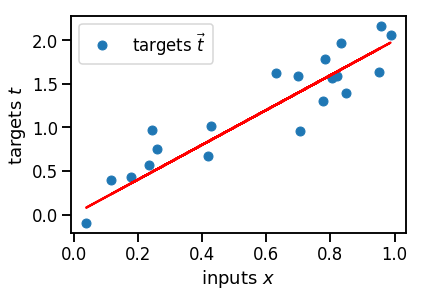

In [3]:
plt.plot(x, t, 'o', label=r'targets $\vec{t}$')
plt.plot(x, f(x), 'r-')
plt.xlabel(r'inputs $x$')
plt.ylabel(r'targets $t$')
plt.legend()

# Loss Function

Let's optimize the model $\vec{y} = w\cdot \vec{x}$ so that loss
$$
w = \mathrm{argmin}_{w} \frac{1}{n}\sum_{i=1}^{n} \|t_i - y_i\|^2
$$

Take a look...

In [4]:
def loss(y, t):
    return np.mean((t-y)**2)

def model(x, w):
    return w * x

Text(0, 0.5, 'loss')

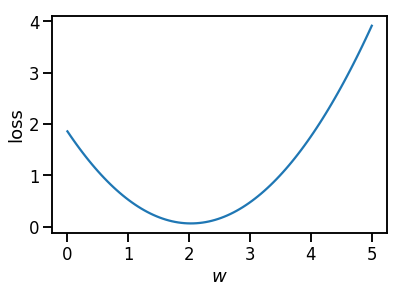

In [5]:
W = np.linspace(0,5,100)
plt.plot(W, [loss(model(x, w), t) for w in W]);

plt.xlabel('$w$')
plt.ylabel('loss')

In [6]:
def dloss(w, x, t):
    return 2 * (1/len(x)) * np.sum((-x) * (t - w * x))

4 1.7570267443217618
3.139783373242795 0.5999005825385526
2.6548432966876305 0.23216030375718133
2.3814623010937104 0.11529066835822233
2.2273460043280804 0.07814893418771593
2.1404642045264852 0.0663451118134668
2.091485301612385 0.06259380009487013
2.063873846323163 0.061401615125975605
2.048308114593202 0.06102273298909211
2.039533060842823 0.06090232241741502
2.0345861961751095 0.060864055356605905


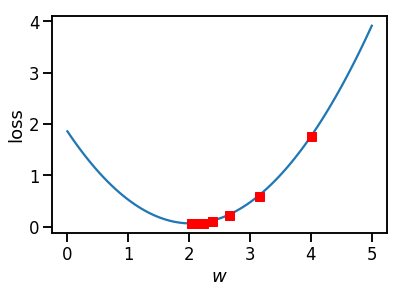

In [7]:
plt.plot(W, [loss(model(x, w), t) for w in W]);
plt.xlabel('$w$')
plt.ylabel('loss')

w = 4
mu = 0.5

print("{} {}".format(w, loss(model(x,w), t)))
plt.plot(w, loss(model(x, w), t), 'rs')

for k in range(10):
    w = w - mu * dloss(w, x, t)
    
    print("{} {}".format(w, loss(model(x,w), t)))
    plt.plot(w, loss(model(x, w), t), 'rs')

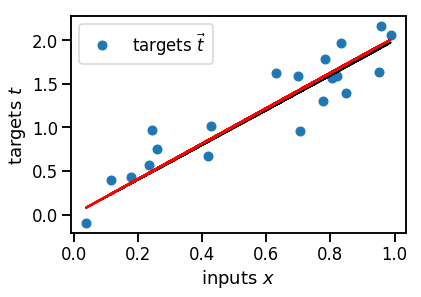

In [8]:
plt.plot(x, t, 'o', label=r'targets $\vec{t}$')
plt.plot(x, f(x), 'k--')
plt.plot(x, w*x, 'r-')
plt.xlabel(r'inputs $x$')
plt.ylabel(r'targets $t$')
plt.legend()